In [1]:
import keras
import tensorflow as tf
%matplotlib inline
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="1"

Using TensorFlow backend.


In [2]:
print("python:{}, keras:{}, tensorflow: {}".format(sys.version, keras.__version__, tf.__version__))

python:3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)], keras:2.0.1, tensorflow: 1.0.1


In [3]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM

in_out_neurons = 1
hidden_neurons = 100

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))  
model.add(Activation("relu"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 40,901.0
Trainable params: 40,901.0
Non-trainable params: 0.0
_________________________________________________________________


In [5]:
import pandas as pd
import numpy as np

def open_with_pandas(filename):
    df = pd.read_csv(filename)
    header = df.columns.values.tolist()
    data = df.values
    return df, header, data

csvfile = "./walksteps.csv"
df, header, data = open_with_pandas(csvfile)


In [7]:
# 平均値補完
from sklearn.preprocessing import Imputer
# 欠損値補完のインスタンス生成（平均値補完）
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
# データを適合
imr = imr.fit(df)
# 補完実行
imputed_data = imr.transform(df.values)
pd.DataFrame(imputed_data)

#print(imputed_data)
imdata = np.array(imputed_data)
imdata= imdata.reshape(imdata.size)
print(data.size)
print(imdata.shape)
print(imdata.size)
#print(header)
#print(df.data)
print(type(data))

372
(369,)
369
<class 'numpy.ndarray'>


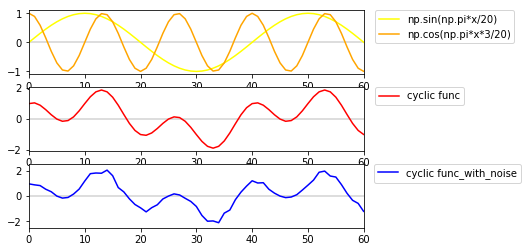

'\na = np.arange(1,10,1)\nb = np.arange(10,1,-1)\ndata = np.hstack((a, b))\ndata = np.tile(data, 100)\ndata_noized = data * (1 + random()) * 0.5\n'

In [8]:
from random import random
import numpy as np

x = np.arange(0, 2000)
data_a = np.sin(np.pi*x/20)
data_b = np.cos(np.pi*x*3/20)
data = data_a + data_b
data_noised = [d * (0.75+0.5*random()) for d in data]

%matplotlib inline
import matplotlib.pyplot as plt

# 新規のウィンドウを描画
fig = plt.figure()
# サブプロットを追加
ax1 = fig.add_subplot(3,1,1)
ax1.axhline(y=0, color='lightgrey')
ax1.plot(data_a, color='yellow', label="np.sin(np.pi*x/20)")
ax1.plot(data_b, color='orange', label="np.cos(np.pi*x*3/20)")
plt.xlim(0,60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.45, 1))

ax3 = fig.add_subplot(3,1,2)
ax3.axhline(y=0, color='lightgrey')
ax3.plot(data, label="cyclic func", color="red")
#ax3.plot(data_noised, label="cyclic func")
plt.xlim(0, 60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.30, 1))
#plt.show()
#plt.savefig("image.png")

ax4 = fig.add_subplot(3,1,3)
ax4.axhline(y=0, color='lightgrey')
ax4.plot(data_noised, label="cyclic func_with_noise", color="blue")
plt.xlim(0, 60)
plt.legend(loc='upper right', borderaxespad=0,bbox_to_anchor=(1.47, 1))
plt.show()
plt.savefig("image2.png")

# データ作成
'''
a = np.arange(1,10,1)
b = np.arange(10,1,-1)
data = np.hstack((a, b))
data = np.tile(data, 100)
data_noized = data * (1 + random()) * 0.5
'''

In [9]:
import numpy as np

def load_data(data, n_prev = 30):  
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data[i:i+n_prev])
        docY.append(data[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(data, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(data) * (1 - test_size))

    X_train, y_train = load_data(data[0:ntrn])
    X_test, y_test = load_data(data[ntrn:])

    print(X_train.shape)
    print(y_train.shape)

    X_train = X_train[:, :, np.newaxis]
    y_train = y_train[:, np.newaxis]
    X_test = X_test[:, :, np.newaxis]
    y_test = y_test[:, np.newaxis]

    print(X_train.shape)

    return (X_train, y_train), (X_test, y_test)

In [10]:
#(X_train, y_train), (X_test, y_test) = train_test_split(data_noised)  # retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(imdata)
print(X_train[0])
#(X_train_wn, y_train_wn), (X_test_wn, y_test_wn) = train_test_split(data)

# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
hist = model.fit(X_train, y_train, batch_size=100, epochs=30000, validation_split=0.05)  

(302, 30)
(302,)
(302, 30, 1)
[[  1.38300000e+03]
 [  9.22800000e+03]
 [  8.63600000e+03]
 [  8.46000000e+03]
 [  8.58300000e+03]
 [  3.72300000e+03]
 [  3.20000000e+01]
 [  1.82100000e+03]
 [  1.01430000e+04]
 [  6.82000000e+03]
 [  5.82700000e+03]
 [  7.60900000e+03]
 [  1.75030000e+04]
 [  4.45700000e+03]
 [  2.20000000e+01]
 [  1.64850000e+04]
 [  8.81100000e+03]
 [  3.74500000e+03]
 [  1.32240000e+04]
 [  1.26670000e+04]
 [  2.29800000e+04]
 [  6.75200000e+03]
 [  6.11000000e+03]
 [  9.05300000e+03]
 [  5.29700000e+03]
 [  1.07670000e+04]
 [  7.83600000e+03]
 [  5.29000000e+03]
 [  4.65000000e+03]
 [  4.79400000e+03]]
Train on 286 samples, validate on 16 samples
Epoch 1/30000
286/286 [==============================] - 1s - loss: 97666963.3007 - acc: 0.0000e+00 - val_loss: 41347816.0000 - val_acc: 0.0000e+00
Epoch 2/30000
286/286 [================

In [11]:
print(X_test.shape)
predicted = model.predict(X_test)  
print(predicted.shape)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
print(rmse)

(7, 30, 1)
(7, 1)
[ 5384.93668496]


ValueError: x and y must have same first dimension, but have shapes (100,) and (7,)

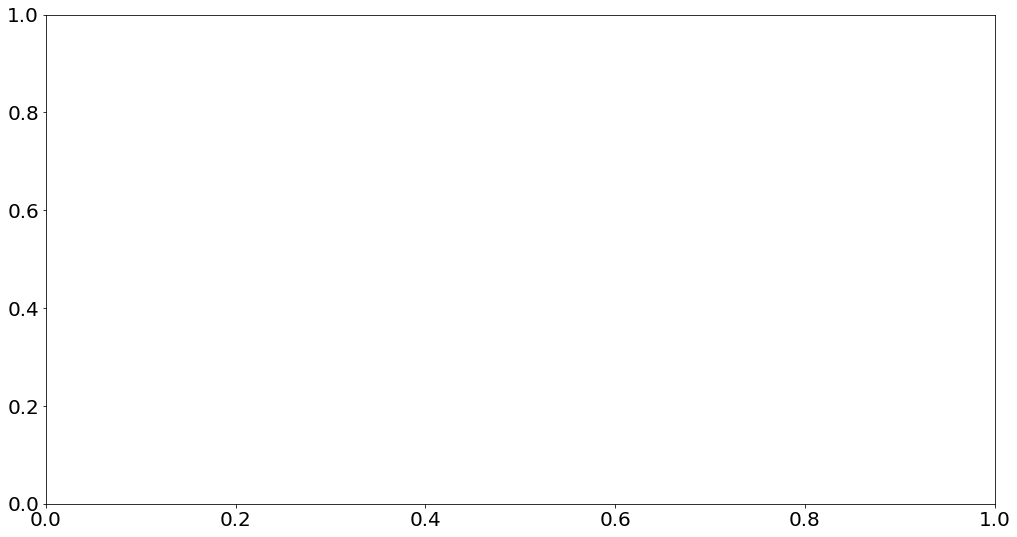

In [12]:
plt.rcParams["figure.figsize"] = (17, 9)
plt.rcParams["font.size"] = 20
plt.plot(np.arange(0, 100), predicted[:100][:,0],color="green")
#plt.plot(np.arange(0, 100), y_test[:100][:,0],":", color="blue")
plt.plot(np.arange(0, 100), y_test_wn[:100][:,0], ":", color="red")
plt.legend(["Prediction", "True func"])
plt.xlim(0,100)
plt.title("epoch:120")
plt.show()

In [ ]:
print(type(hist.history))
hist2 = hist.history
print(type(hist2))
print(hist2.keys())

fig1 = plt.figure()

plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(0, 2000)
plt.plot(hist2['val_loss'], label="test_loss")
plt.plot(hist2['loss'], label="training_loss")
plt.legend()
plt.show()

fig2 = plt.figure()

plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(0, 2000)
plt.plot(hist2['val_acc'], label="test_accuracy")
plt.plot(hist2['acc'], label="training_accuracy")
plt.legend()
plt.show()